<a href="https://colab.research.google.com/github/fjadidi2001/DataScienceJourney/blob/master/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Step 1: Load the dataset
dataset = pd.read_csv('/content/drive/My Drive/telematics_syn.csv')

# Step 2: Create the adjusted ClaimYN label
# ClaimYN = 1 if NB_Claim >= 1 and AMT_Claim > 1000, else 0
dataset['ClaimYN'] = ((dataset['NB_Claim'] >= 1) & (dataset['AMT_Claim'] > 1000)).astype(int)

# Step 3: Display the distribution of the new labels
label_distribution = dataset['ClaimYN'].value_counts().sort_index()
label_mapping = {0: 'Not Risky', 1: 'Risky'}
print("\nAdjusted Distribution of ClaimYN Labels:")
for label, count in label_distribution.items():
    print(f"{label_mapping[label]} ({label}): {count} instances")

# Step 4: Save the updated dataset with the new labels
dataset.to_csv('telematics_syn_with_Adjusted_ClaimYN.csv', index=False)


Adjusted Distribution of ClaimYN Labels:
Not Risky (0): 97302 instances
Risky (1): 2698 instances


In [4]:
df = pd.read_csv('telematics_syn_with_Adjusted_ClaimYN.csv')
df.head()

,Duration,Insured.age,Insured.sex,Car.age,Marital,Car.use,Credit.score,Region,Annual.miles.drive,Years.noclaims,...,Left.turn.intensity11,Left.turn.intensity12,Right.turn.intensity08,Right.turn.intensity09,Right.turn.intensity10,Right.turn.intensity11,Right.turn.intensity12,NB_Claim,AMT_Claim,ClaimYN
0,366,45,Male,-1,Married,Commute,609.0,Urban,6213.71,25,...,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1,5100.171753,1
1,182,44,Female,3,Married,Commute,575.0,Urban,12427.42,20,...,24.0,11.0,1099.0,615.0,219.0,101.0,40.0,1,883.554840,0
2,184,48,Female,6,Married,Commute,847.0,Urban,12427.42,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0
3,183,71,Male,6,Married,Private,842.0,Urban,6213.71,43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0
4,183,84,Male,10,Married,Private,856.0,Urban,6213.71,65,...,0.0,0.0,325.0,111.0,18.0,4.0,2.0,0,0.000000,0


In [5]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Step 4: Preprocess the dataset
# 1. Handle missing values (if any)
dataset.fillna(method='ffill', inplace=True)  # Simple forward fill for missing values

# 2. Encode categorical variables (if any exist)
# Assuming 'CategoryColumn' is a placeholder for actual categorical columns in your dataset
categorical_columns = dataset.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])

# 3. Standardize numerical columns
# Assuming all columns except 'ClaimYN' and the original claims columns are numerical
numerical_columns = dataset.drop(columns=['ClaimYN', 'NB_Claim', 'AMT_Claim']).columns
scaler = StandardScaler()
dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])

<ipython-input-5-510080e7c0ff>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method='ffill', inplace=True)  # Simple forward fill for missing values


In [6]:
print(numerical_columns)

Index(['Duration', 'Insured.age', 'Insured.sex', 'Car.age', 'Marital',
       'Car.use', 'Credit.score', 'Region', 'Annual.miles.drive',
       'Years.noclaims', 'Territory', 'Annual.pct.driven',
       'Total.miles.driven', 'Pct.drive.mon', 'Pct.drive.tue', 'Pct.drive.wed',
       'Pct.drive.thr', 'Pct.drive.fri', 'Pct.drive.sat', 'Pct.drive.sun',
       'Pct.drive.2hrs', 'Pct.drive.3hrs', 'Pct.drive.4hrs', 'Pct.drive.wkday',
       'Pct.drive.wkend', 'Pct.drive.rush am', 'Pct.drive.rush pm',
       'Avgdays.week', 'Accel.06miles', 'Accel.08miles', 'Accel.09miles',
       'Accel.11miles', 'Accel.12miles', 'Accel.14miles', 'Brake.06miles',
       'Brake.08miles', 'Brake.09miles', 'Brake.11miles', 'Brake.12miles',
       'Brake.14miles', 'Left.turn.intensity08', 'Left.turn.intensity09',
       'Left.turn.intensity10', 'Left.turn.intensity11',
       'Left.turn.intensity12', 'Right.turn.intensity08',
       'Right.turn.intensity09', 'Right.turn.intensity10',
       'Right.turn.intensity1

In [7]:
print(categorical_columns)

Index(['Insured.sex', 'Marital', 'Car.use', 'Region'], dtype='object')


In [8]:
from imblearn.over_sampling import SMOTE

# Step 5: Handle the imbalance in the dataset
X = dataset.drop(columns=['ClaimYN'])
y = dataset['ClaimYN']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Merging resampled data back into a single DataFrame
dataset_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Display the new distribution of ClaimYN after resampling
label_distribution_resampled = dataset_resampled['ClaimYN'].value_counts().sort_index()
print("\nResampled Distribution of ClaimYN Labels:")
for label, count in label_distribution_resampled.items():
    print(f"{label_mapping[label]} ({label}): {count} instances")


Resampled Distribution of ClaimYN Labels:
Not Risky (0): 97302 instances
Risky (1): 97302 instances


In [9]:
# Step 6: Drop NB_Claim and AMT_Claim columns
dataset_resampled = dataset_resampled.drop(columns=['NB_Claim', 'AMT_Claim'])

In [10]:
from sklearn.model_selection import train_test_split

# Step 7: Split the dataset into train, test, and validation sets
X = dataset_resampled.drop(columns=['ClaimYN'])
y = dataset_resampled['ClaimYN']

# Split the data (70% train, 15% test, 15% validation)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")
print(f"Validation set size: {len(X_val)}")

Training set size: 136222
Testing set size: 29191
Validation set size: 29191


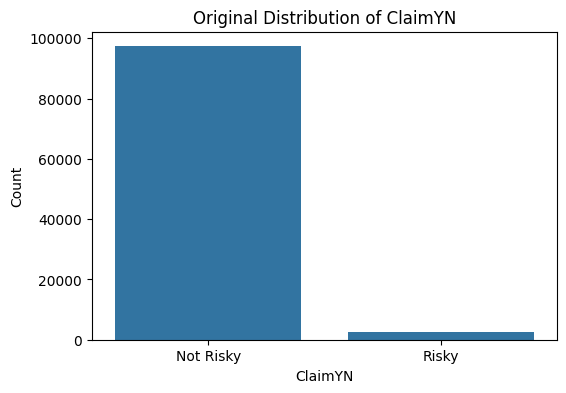

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the original distribution of ClaimYN
plt.figure(figsize=(6, 4))
sns.countplot(x=dataset['ClaimYN'])
plt.title('Original Distribution of ClaimYN')
plt.xlabel('ClaimYN')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Risky', 'Risky'])
plt.show()